<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/ref/geron/chap_2/5_prepare_for_algorithms/1_prepare_for_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/taca/blob/main/ref/geron/chap_2/5_prepare_for_algorithms/1_prepare_for_algorithms.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# [Linear Regression With Time Series](https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series) 

## [Video de apoyo a la lectura interactiva de este cuaderno]()

¡Bienvenido a Time Series!

La previsión es quizás la aplicación más común del aprendizaje automático en el mundo real.

Las empresas pronostican la demanda de productos, los gobiernos pronostican el crecimiento económico y de la población, los meteorólogos pronostican el clima.

La comprensión de lo que vendrá es una necesidad urgente en la ciencia, el gobierno y la industria (¡sin mencionar nuestras vidas personales!), y los profesionales en estos campos están aplicando cada vez más el aprendizaje automático para abordar esta necesidad.

El pronóstico de series de tiempo es un campo amplio con una larga historia.

Este curso se centra en la aplicación de métodos modernos de aprendizaje automático a datos de series de tiempo con el objetivo de producir las predicciones más precisas.

Las lecciones de este curso se inspiraron en soluciones ganadoras de concursos de predicción de Kaggle anteriores, pero serán aplicables siempre que las predicciones precisas sean una prioridad.

Después de terminar este curso, sabrá cómo:

* diseñar características para modelar los principales componentes de series de tiempo (tendencias, estaciones y ciclos),   

* visualizar series de tiempo con muchos tipos de diagramas de series de tiempo, 

* crear híbridos de pronóstico que combinen las fortalezas de modelos complementarios, y adapte los métodos  
  de aprendizaje automático a una variedad de tareas de pronóstico.

Como parte de los ejercicios, tendrá la oportunidad de participar en nuestro concurso Ventas en la tienda: Introducción a la previsión de series temporales. En esta competencia, tiene la tarea de pronosticar las ventas de Corporación Favorita (un gran minorista de comestibles con sede en Ecuador) en casi 1800 categorías de productos.

¿Qué es una serie temporal?


El objeto básico de la predicción es la serie temporal, que es un conjunto de observaciones registradas a lo largo del tiempo. En las aplicaciones de pronóstico, las observaciones se registran normalmente con una frecuencia regular, como diaria o mensual.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/marco-canas/taca/main/datasets/time_series/electric_production.csv'
df = pd.read_csv( url, index_col = 'DATE')  

df

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
...,...
9/1/2017,98.6154
10/1/2017,93.6137
11/1/2017,97.3359


In [5]:
df.columns

Index(['IPG2211A2N', 'Time'], dtype='object')

Esta serie registra la producción eléctrica mensual del primero de enero de 1985 al primero de enero de 2018. Observe que tenemos una sola columna de observaciones Tapa dura (Hardcover) con un índice de tiempo Fecha(Date).

## Regresión lineal con series de tiempo

En la primera parte de este curso, usaremos el algoritmo de regresión lineal para construir modelos de pronóstico. La regresión lineal se usa ampliamente en la práctica y se adapta de forma natural incluso a tareas de pronóstico complejas.

El algoritmo de regresión lineal aprende a hacer una suma ponderada a partir de sus características de entrada. Para dos características, tendríamos:

$$ \text{target}\  = \text{weight_1} \ast \text{feature_1} + \text{weight_2} \ast \text{feature_2} + \text{bias} $$


Durante el entrenamiento, el algoritmo de regresión aprende valores para los parámetros `peso_1`, `peso_2` y sesgo que mejor se ajustan al objetivo. 

(Este algoritmo a menudo se denomina mínimos cuadrados ordinarios, ya que elige valores que minimizan el error al cuadrado entre el objetivo y las predicciones). 

Los pesos también se denominan coeficientes de regresión y el sesgo también se denomina intersección porque indica dónde se encuentra la gráfica de este La función cruza el eje `y`.

## Atributos de las series de tiempo

Hay dos tipos de atributos exclusivos de las series de tiempo:  time-step feature y `lang feature` (atributo de retraso).

Los atributos de paso de tiempo (`time-step`) son características que podemos derivar directamente del índice de tiempo.

La función de intervalo de tiempo más básica es el indicador de tiempo (`time dummy`), que cuenta los intervalos de tiempo de la serie desde el principio hasta el final.

In [3]:
import numpy as np

df['Time'] = np.arange(len(df.index))

df.head()

,IPG2211A2N,Time
DATE,,
1/1/1985,72.5052,0
2/1/1985,70.6720,1
3/1/1985,62.4502,2
4/1/1985,57.4714,3
5/1/1985,55.3151,4


La regresión lineal con la variable de tiempo produce el modelo:

`target = weight * time + bias`


El maniquí de tiempo nos permite ajustar las curvas a las series de tiempo en un gráfico de tiempo, donde el tiempo forma el eje x.

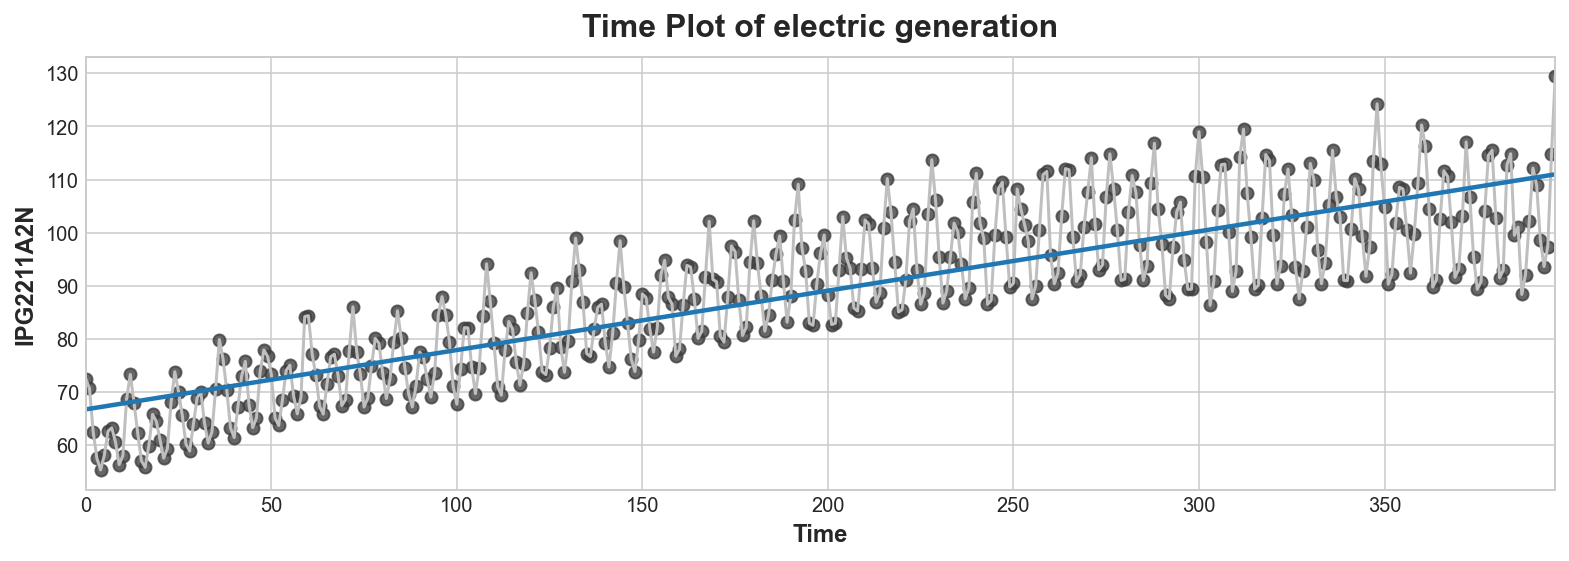

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'IPG2211A2N', data=df, color='0.75')
ax = sns.regplot(x='Time', y='IPG2211A2N', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of electric generation');

Los atributos de paso de tiempo (time-step feature) le permiten modelar la dependencia del tiempo.

Una serie depende del tiempo si sus valores se pueden predecir desde el momento en que ocurrieron.

En la serie `Generación eléctrica` podemos predecir que la generación eléctrica a finales de mes es generalmente más alta que la generación eléctrica a principios de mes.

## Funciones de retraso (Lang features) 

Para hacer una característica de retraso, cambiamos las observaciones de la serie objetivo para que parezcan haber ocurrido más tarde en el tiempo. Aquí hemos creado una función de retraso de 1 paso, aunque también es posible cambiar en varios pasos.

In [8]:
df['Lag_1'] = df['IPG2211A2N'].shift(1)
df = df.reindex(columns=['IPG2211A2N', 'Lag_1'])

df.head()

,IPG2211A2N,Lag_1
DATE,,
1/1/1985,72.5052,NaN
2/1/1985,70.6720,72.5052
3/1/1985,62.4502,70.6720
4/1/1985,57.4714,62.4502
5/1/1985,55.3151,57.4714


La regresión lineal con una característica de retraso produce el modelo:

`target = weight * lag + bias`  


Por lo tanto, las características de retraso nos permiten ajustar curvas a gráficos de retraso en los que cada observación de una serie se representa frente a la observación anterior.

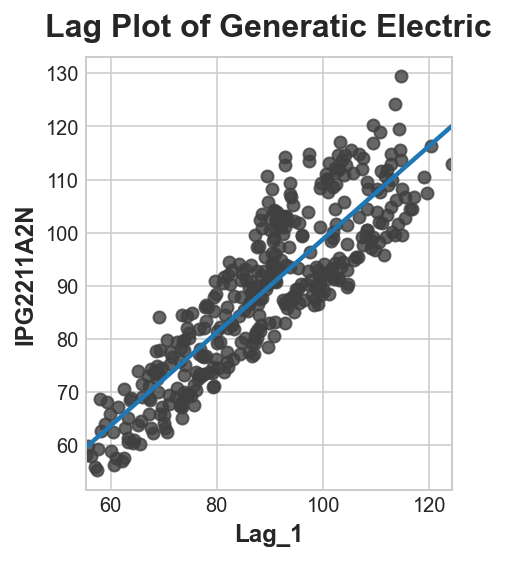

In [9]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='IPG2211A2N', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Generatic Electric'); 

Puede ver en el gráfico de retraso que las ventas de un día (tapa dura) están correlacionadas con las ventas del día anterior `(Lag_1)`. 

Cuando vea una relación como esta, sabrá que una función de retraso será útil.

De manera más general, las funciones de retraso le permiten modelar la dependencia en serie. 

Una serie de tiempo tiene dependencia serial cuando una observación se puede predecir a partir de observaciones previas. 

En las ventas de tapa dura, podemos predecir que las ventas altas en un día generalmente significan ventas altas al día siguiente.

La adaptación de los algoritmos de aprendizaje automático a los problemas de series de tiempo se trata en gran medida de la ingeniería de características con el índice de tiempo y los retrasos. 

Durante la mayor parte del curso, usamos la regresión lineal por su simplicidad, pero estas características serán útiles independientemente del algoritmo que elija para su tarea de pronóstico.

## Ejemplo: tráfico de túneles

Tunnel Traffic es una serie de tiempo que describe la cantidad de vehículos que viajan a través del túnel Baregg en Suiza cada día desde noviembre de 2003 a noviembre de 2005. En este ejemplo, practicaremos la aplicación de regresión lineal a características de paso de tiempo y características de retraso.

La celda oculta configura todo.

In [12]:
import pandas as pd
df2 = pd.read_csv(url)
df2.head(2) 

,YR_MTH,MODE,TTD_PTO_CODE,RAIL_LINE,AVG_DAILY_PAX,AVG_DAILY_PAX_INDI
0,201301,PLB,GMB,NaN,1524.986323,NaN
1,201301,PLB,RMB,NaN,358.301194,NaN


In [14]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Public Traffic dataset
url = 'https://raw.githubusercontent.com/marco-canas/taca/main/datasets/time_series/public_transport.csv'
traffic = pd.read_csv(url)

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.

traffic= traffic.set_index("YR_MTH")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
#traffic = traffic.to_period()

traffic.head()

,MODE,TTD_PTO_CODE,RAIL_LINE,AVG_DAILY_PAX,AVG_DAILY_PAX_INDI
YR_MTH,,,,,
201301,PLB,GMB,NaN,1524.986323,NaN
201301,PLB,RMB,NaN,358.301194,NaN
201301,Ferries,NWFF,NaN,35.129742,NaN
201301,Ferries,STF,NaN,57.031742,NaN
201301,Ferries,LFS,NaN,35.721387,NaN


# Práctica sobre el uso del método `.to_period()` de Pandas

## Referencias  

* Ejemplos de dataset para series de tiempo: https://www.kaggle.com/shenba/time-series-datasets?select=sales-of-shampoo-over-a-three-ye.csv 

* Documentación del método `.to_period()` de pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html